#  Gathering Data on Cube Sizes

The goal of this notebook is to gather information about image cube sizes currently seen in ALMA

In [1]:
from importlib import reload
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

In [2]:
import large_cubes

In [3]:
reload(large_cubes)

<module 'large_cubes' from '/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/large_cubes.py'>

## Get data

In [ ]:
result2019 = large_cubes.get_archive_info(year=2019,filename='data/archive_query_results_2019projects_20220923.csv')

In [ ]:
result2019.columns

In [ ]:
result2021 = large_cubes.get_archive_info(year=2021,filename='data/archive_query_results_2021projects_20220923.csv')

In [ ]:
result2021.columns

In [ ]:
result2019.write('data/archive_query_results_2019projects_20220923.csv')

In [ ]:
result2021.write('data/archive_query_results_2021projects_20220923.csv')

## Reload data (if necessary)

In [ ]:
result2019 = large_cubes.read_archive_info('data/archive_query_results_2019projects_20220923.csv')

In [ ]:
result2021 = large_cubes.read_archive_info('data/archive_query_results_2021projects_20220923.csv')

## Parse data

In [ ]:
reload(large_cubes)

In [ ]:
large_cubes.munge_archive_info(result2019,'data/result_table_cycle7_with_calc_values_20220923.csv')

In [ ]:
large_cubes.munge_archive_info(result2021,'data/result_table_cycle8_with_calc_values_20220923.csv')

## Read databases

In [4]:
result2019 = Table.read('data/result_table_cycle7_with_calc_values_20220923.csv')

In [5]:
result2021 = Table.read('data/result_table_cycle8_with_calc_values_20220923.csv')

## Make Parameter Space Plots

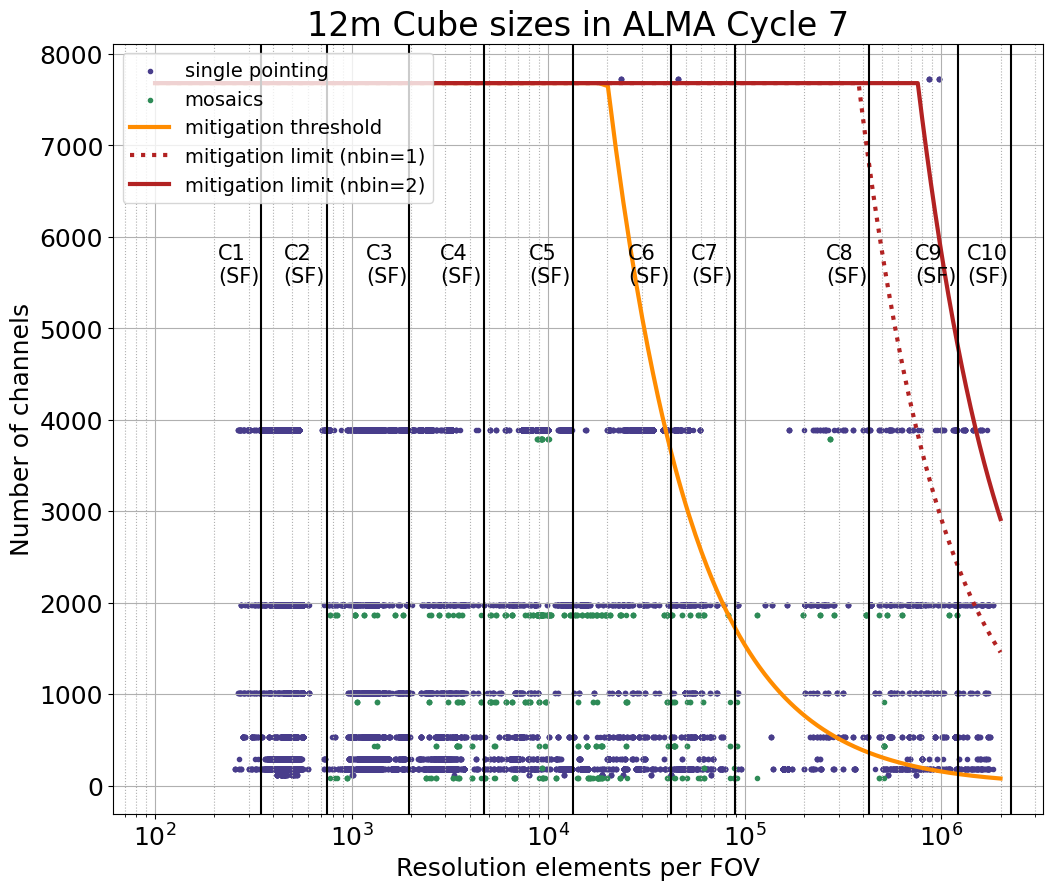

In [6]:
large_cubes.make_beamsperfov_vs_nchan(result2019, 'plots/cycle7_12m_cube_size.png', array='12m', addconfigs=True, cycle='7')

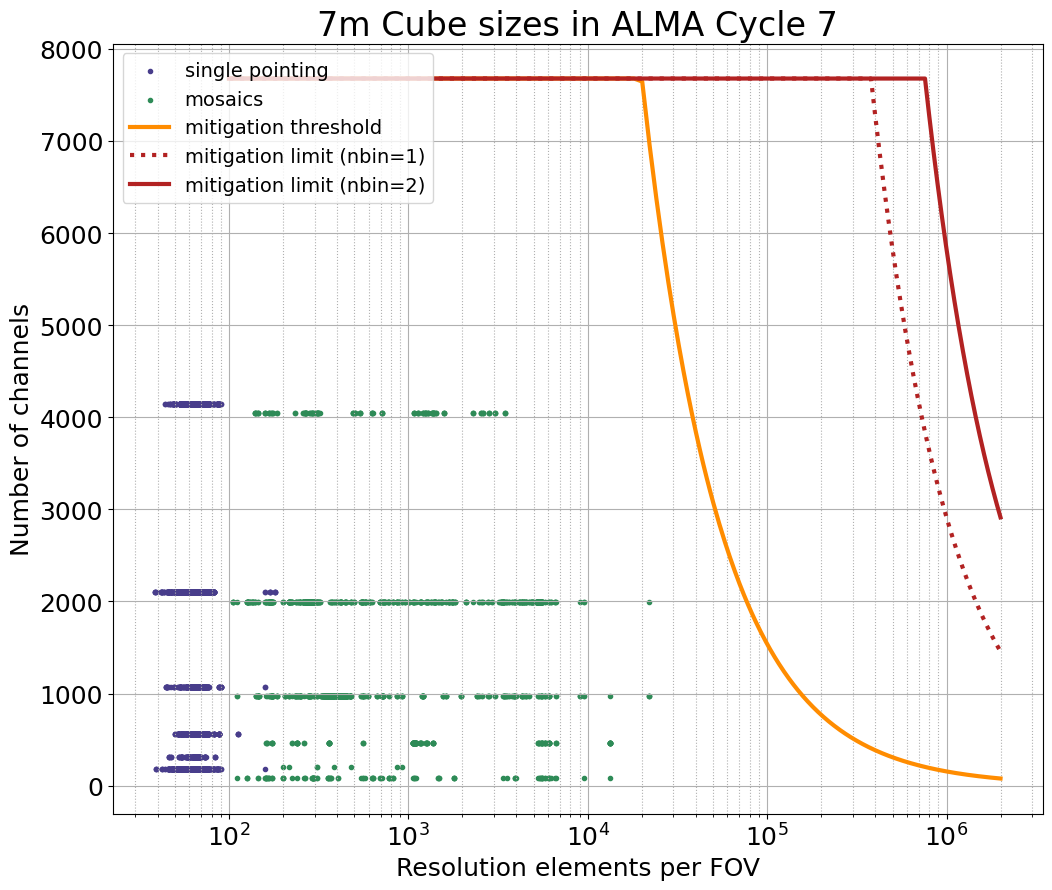

In [7]:
large_cubes.make_beamsperfov_vs_nchan(result2019, 'plots/cycle7_7m_cube_size.png', array='7m', addconfigs=False, cycle='7')

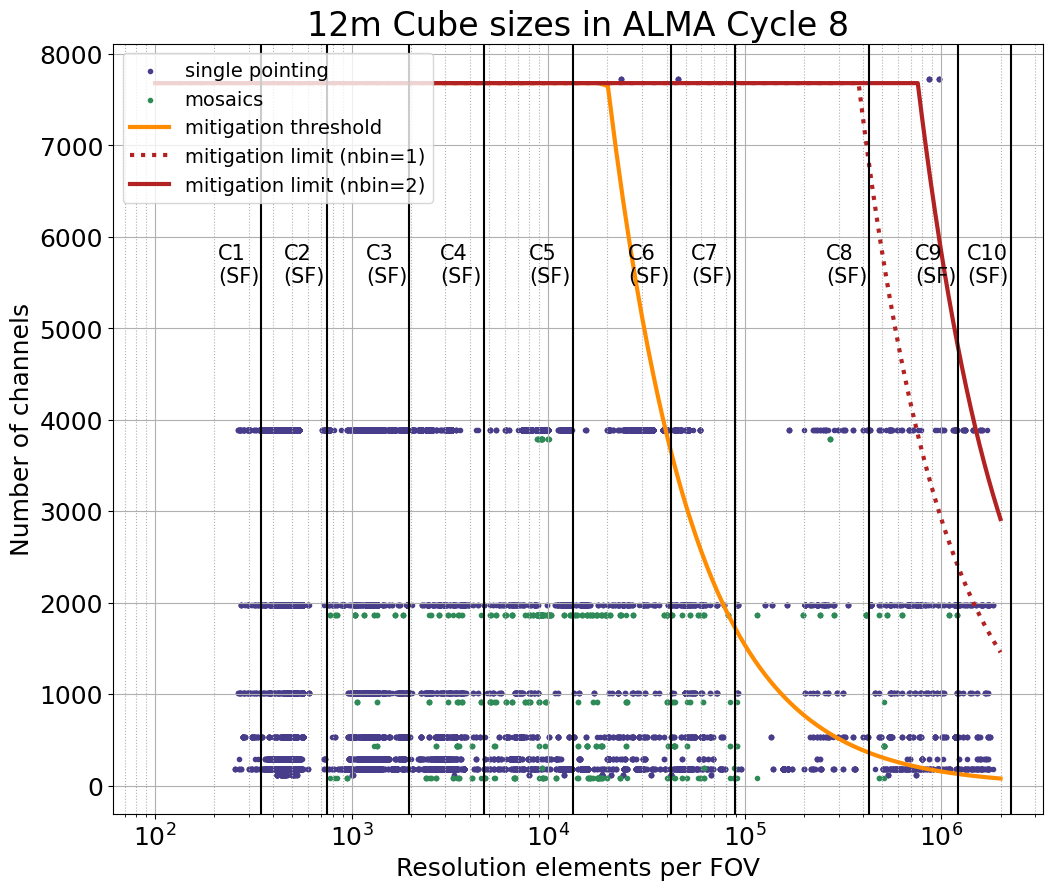

In [8]:
large_cubes.make_beamsperfov_vs_nchan(result2021, 'plots/cycle8_12m_cube_size.png', array='12m', addconfigs=True, cycle='8')

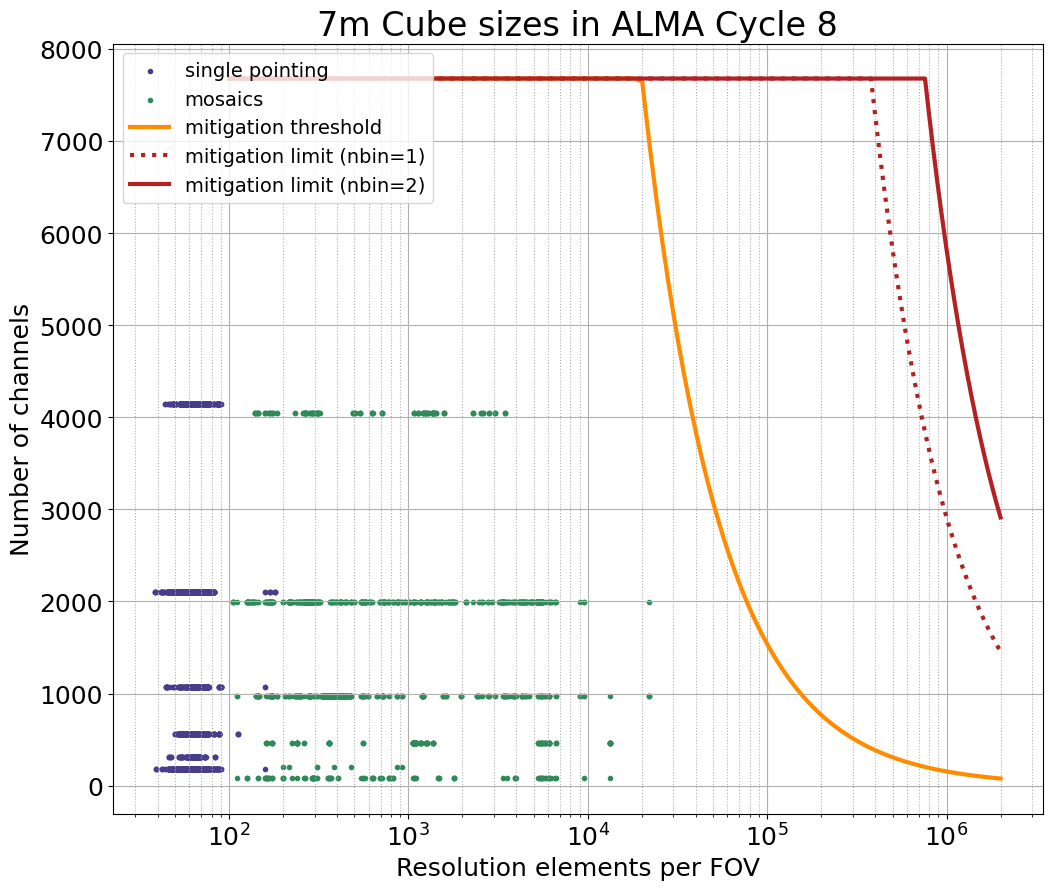

In [9]:
large_cubes.make_beamsperfov_vs_nchan(result2021, 'plots/cycle8_7m_cube_size.png', array='7m', addconfigs=False, cycle='8')

## Plot showing SCG sample

In [10]:
mous_list = [{'member_ous_uid':'uid://A001/X1465/X20d0','marker':'^'}, #original tests
             {'member_ous_uid': 'uid://A001/X1465/X2009', 'marker':'^'}, #original tests
             {'member_ous_uid': 'uid://A001/X1465/X3477', 'marker': '^'}, #original tests
             {'member_ous_uid': 'uid://A001/X1465/X20c1', 'marker': '^'}, #mosaics
             {'member_ous_uid': 'uid://A001/X1465/X3465', 'marker': '^'}, #mosaics
             {'member_ous_uid': 'uid://A001/X1471/X317', 'marker': '^'}, # mosaics
             {'member_ous_uid': 'uid://A001/X1465/Xd63', 'marker': 's'}, # single field
             {'member_ous_uid': 'uid://A001/X1465/Xc05', 'marker': 's'}, # single field
             {'member_ous_uid': 'uid://A001/X1465/X1ac2', 'marker' : 's'}, # single field
             {'member_ous_uid': 'uid://A001/X1465/X2a84', 'marker': 'p','markersize':75}] # single pol             

In [11]:
new_mous_list = []

for mous in mous_list:
    idx = result2019['member_ous_uid'] == mous['member_ous_uid']
    prop = np.unique(result2019[idx]['proposal_id'].data[0])[0]
    
    mous['proposal_id'] = prop
    mous['points_per_fov'] = result2019[idx]['points_per_fov'].data
    mous['spw_nchan'] = result2019[idx]['spw_nchan'].data
    
    new_mous_list.append(mous)

In [12]:
new_mous_list

[{'member_ous_uid': 'uid://A001/X1465/X20d0',
  'marker': '^',
  'proposal_id': '2019.1.00876.S',
  'points_per_fov': array([61832.15212103, 61832.15212103, 61832.15212103, 61832.15212103]),
  'spw_nchan': array([1920.,  128., 1920., 1920.])},
 {'member_ous_uid': 'uid://A001/X1465/X2009',
  'marker': '^',
  'proposal_id': '2019.1.00915.S',
  'points_per_fov': array([ 9964.66212223,  9964.66212223,  9964.66212223,  9964.66212223,
         10008.18398075, 10008.18398075, 10008.18398075, 10008.18398075,
         10023.02473391, 10023.02473391, 10023.02473391, 10023.02473391,
         10046.48104258, 10046.48104258, 10046.48104258, 10046.48104258,
         10028.88558185, 10028.88558185, 10028.88558185, 10028.88558185]),
  'spw_nchan': array([3840., 1920., 1920., 1920., 1920., 1920., 3840., 1920., 1920.,
         1920., 3840., 1920., 1920., 1920., 3840., 1920., 1920., 1920.,
         1920., 3840.])},
 {'member_ous_uid': 'uid://A001/X1465/X3477',
  'marker': '^',
  'proposal_id': '2019.1.00

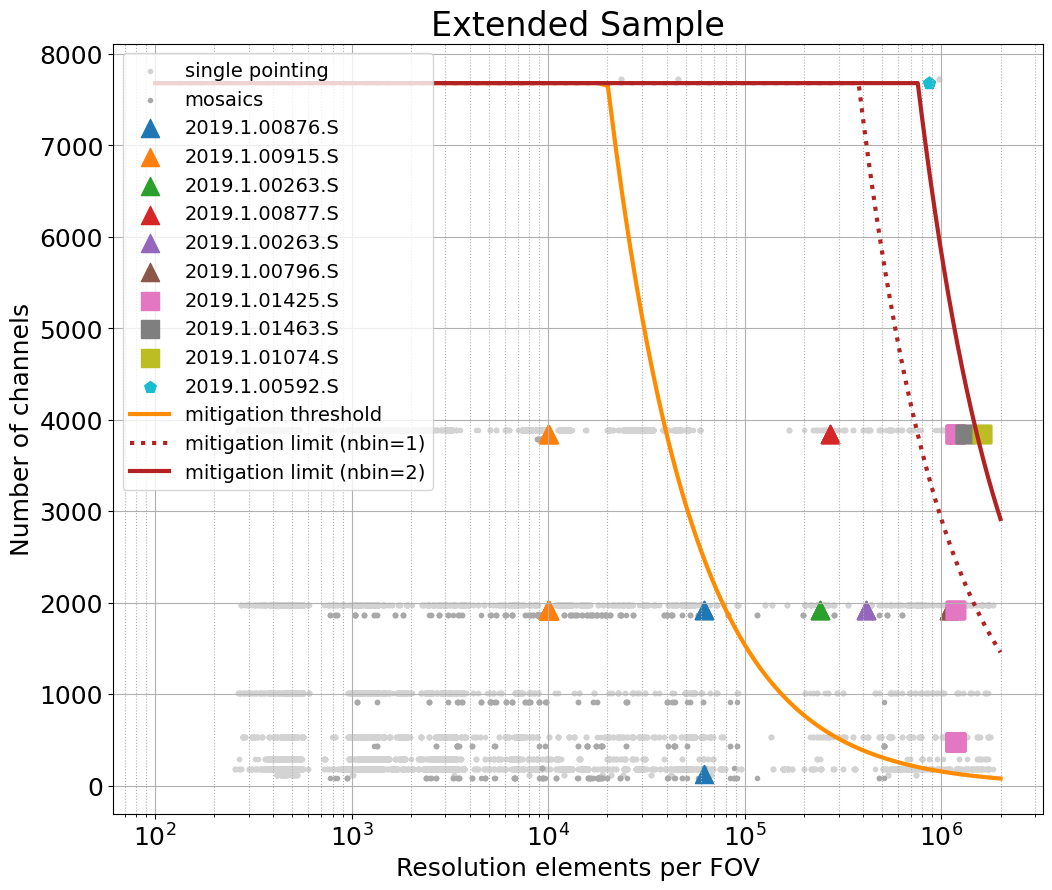

In [21]:
reload(large_cubes)
large_cubes.make_beamsperfov_vs_nchan(result2019,'plots/cycle7_12m_cube_size_scg.png',array='12m',
                                      addconfigs=False,cycle='7',mous_list=mous_list,
                                      plt_title='Extended Sample', markersize=170)

In [18]:
mous_list_initial = [{'member_ous_uid':'uid://A001/X1465/X3a33', 'proposal_id':'2019.1.00092.S', 'points_per_fov':np.array([1428.0]) , 'spw_nchan': np.array([3840]),'marker':'s'},
                    {'member_ous_uid':'uid://A001/X146c/Xd8','proposal_id':'2019.1.00195.L','points_per_fov':np.array([517.0]), 'spw_nchan': np.array([3840]),'marker':'s'},
                    {'member_ous_uid':'uid://A001/X133d/X2067','proposal_id':'2018.1.00566.S','points_per_fov':np.array([901816.0]),'spw_nchan': np.array([240]),'marker':'s'},
                    {'member_ous_uid': 'uid://A001/X13b3/Xdc','proposal_id':'2018.A.00031.T','points_per_fov':np.array([327800.0]),'spw_nchan': np.array([1920]), 'marker':'s'},
                    {'member_ous_uid': 'uid://A001/X1296/X7b1', 'proposal_id':'2017.1.00884.S','points_per_fov':np.array([1018995.0]), 'spw_nchan': np.array([3840]), 'marker':'s'},
                    {'member_ous_uid':'uid://A001/X12a3/X3be','proposal_id':'2017.1.00983.S','points_per_fov':np.array([14268.0]), 'spw_nchan': np.array([3840]), 'marker':'^'}]
                     

In [19]:
mous_list_initial

[{'member_ous_uid': 'uid://A001/X1465/X3a33',
  'proposal_id': '2019.1.00092.S',
  'points_per_fov': array([1428.]),
  'spw_nchan': array([3840]),
  'marker': 's'},
 {'member_ous_uid': 'uid://A001/X146c/Xd8',
  'proposal_id': '2019.1.00195.L',
  'points_per_fov': array([517.]),
  'spw_nchan': array([3840]),
  'marker': 's'},
 {'member_ous_uid': 'uid://A001/X133d/X2067',
  'proposal_id': '2018.1.00566.S',
  'points_per_fov': array([901816.]),
  'spw_nchan': array([240]),
  'marker': 's'},
 {'member_ous_uid': 'uid://A001/X13b3/Xdc',
  'proposal_id': '2018.A.00031.T',
  'points_per_fov': array([327800.]),
  'spw_nchan': array([1920]),
  'marker': 's'},
 {'member_ous_uid': 'uid://A001/X1296/X7b1',
  'proposal_id': '2017.1.00884.S',
  'points_per_fov': array([1018995.]),
  'spw_nchan': array([3840]),
  'marker': 's'},
 {'member_ous_uid': 'uid://A001/X12a3/X3be',
  'proposal_id': '2017.1.00983.S',
  'points_per_fov': array([14268.]),
  'spw_nchan': array([3840]),
  'marker': '^'}]

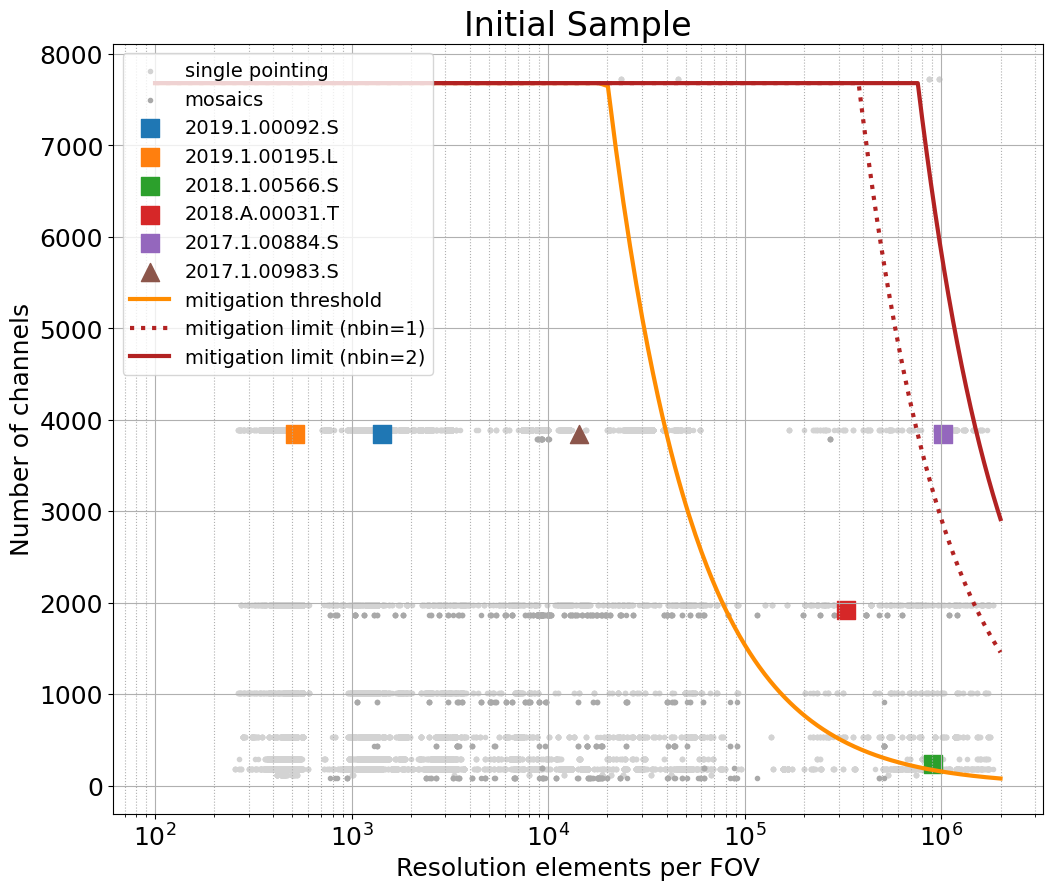

In [22]:
reload(large_cubes)
large_cubes.make_beamsperfov_vs_nchan(result2019,'plots/cycle7_12m_cube_size_scg_initial.png',array='12m',
                                      addconfigs=False,cycle='7',mous_list=mous_list_initial,
                                      plt_title='Initial Sample',markersize=170)